# CSCI 4622 - Spring 2018 - Practicum 
***


This practicum is due on Moodle by **11:59pm on Thursday May 3rd**. 

**Here are the rules:** 

4. Your work must be done entirely on your own. You may **NOT** collaborate with classmates or anyone else.  
3. You may **NOT** post to message boards or other online resources asking for help. 
5. You may **NOT** use late days on the practicum nor can you drop your practicum grade. 
1. You may use your course notes, posted lecture slides, in-class notebooks, and homework solutions as resources. 
2. You may consult alternate sources like blog posts or technical papers, but you may **NOT** copy code from these sources. 
3. Any additional non-course sources that you use should be clearly cited (with links) in the **References** section at the bottom of this notebook. 
7. Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

Violation of the above rules will result in an **F** in the course and a trip to **Honor Council** 

***

**By writing your name below you agree to abide by the given rules:**

**Name**: $<$insert name here$>$

**Kaggle Username**: $<$insert username here$>$

***


**NOTES**: 

- You do not need to implement everything from scratch.  At this point you should be leveraging Sklearn as much as you can. 
- If you have a clarifying question, please post it as a **PRIVATE** message to me on Piazza. 
- Part of the goal of this assignment is to see if you can stand on your own.  Please do not ask me to help you debug code or check if your answers are correct. Most of the implementation details necessary to complete this practicum can be found in the Hands-On notebooks or the Sklearn documentation.  
- You'll notice that the point totals below do not add up to 100.  This is because 10 out of the 100 points will be attributed to **style**.  To earn full credit for style your analysis should be concise and well-organized, your code should be readable and well-commented, and you should use plots and graphics to support your conclusions whenever appropriate.  

In [2]:
import pickle, gzip 
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

### [35 points] Problem 1: Building Classifiers for Fashion MNIST 
***

The classic MNIST Handwritten Digit data set has been a staple in the machine learning literature since the beginning of time (i.e. the late 90's).  However, machine learning practitioners have grown tired of the rusty digits and have recently begun to create and explore new, more interesting data sets. Some popular alternatives to emerge recently are [EMNIST](https://www.kaggle.com/crawford/emnist), [Sign Language MNIST](https://www.kaggle.com/datamunge/sign-language-mnist), and [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist). In this problem you will explore the latter. 

Fashion MNIST is comprised of $28 \times 28$ pixel gray-scale images of clothing, with classes corresponding to things like tops, trousers, coats, dresses, and various types of shoes.  The data set that we'll work with corresponds to a small subset of Fashion MNIST with 1500 examples from each of five distinct classes (tops, trousers, coats, sneakers, and ankle boots). 

Execute the following cell to load the data. 

In [3]:
f = gzip.open('data/fashion_mnist_subset.pklz', 'rb')
X_all, y_all = pickle.load(f)
f.close()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all,y_all,test_size = 0.25)

In **Parts A-C** you will construct various tuned classifiers for making predictions on Fashion MNIST.  For each classifier you should: 
- Describe and motivate any transformations on the pixel data that you found helpful/necessary to make your model work well. 
- Describe and justify your process for determining optimal hyperparameters for each model. Support your decisions with validation studies and associated graphics.  Do **NOT** just report the hyperparameters that worked best.  
- Describe how you evaluated your models during your process (i.e. did you use a validation set, did you do cross-validation, etc). 
- Report the final optimal hyperparameters that you used as well as the accuracy of your final model. 

**Part A**: Construct a K-Nearest Neighbors classifier to make predictions on the data. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = [14,12,10,8,6,4,2,1]
UknnCrossVal = []
WknnCrossVal = []
for n in neighbors:
    Uknn = KNeighborsClassifier(n_neighbors=n, weights='uniform',algorithm='ball_tree')
    Wknn = KNeighborsClassifier(n_neighbors=n, weights='distance',algorithm='ball_tree')
    UknnCrossVal.append(np.mean(cross_val_score(Uknn,X_all,y_all)))
    WknnCrossVal.append(np.mean(cross_val_score(Wknn,X_all,y_all)))

    


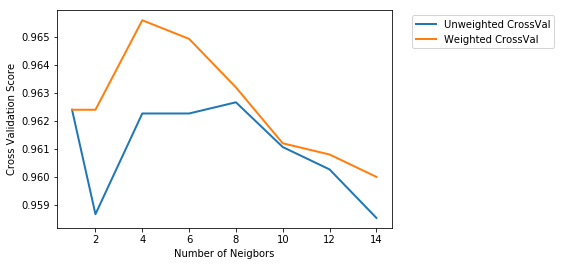

Best Cross Validation Score (Weighted KNN) 0.9612000000000002


In [18]:
U_label = 'Unweighted CrossVal'
W_label = 'Weighted CrossVal'
plt.plot(neighbors,UknnCrossVal,lw = 2,label = U_label)
plt.plot(neighbors,WknnCrossVal,lw = 2,label = W_label)
plt.ylabel('Cross Validation Score')
plt.xlabel('Number of Neigbors')
plt.legend(loc = 'upper right',bbox_to_anchor = [1.5,1])
plt.show()
print('Best Cross Validation Score (Weighted KNN) {}'.format(WknnCrossVal[2]))

Looking at the graphic, the best cross validation score achieved was at $k=4$ with the weighted KNN classifier.  
Since the number of neighbors is inversely related to the flexibility/variance of the KNN model, when $k < 4$, the model was overfitting the training data whereas when $k > 4$ the model was not flexible enough for the dataset. This is evident in the peaks near and around 4 in the weighted case. In the unweighted case, $k=4$ was still a good result but $k=8$ was better. The unweighted was never as effective as the weighted however, implying that distance is an important feature to scale with. 

**Part B**: Construct a Linear Support Vector Machine classifier to make predictions on the data. 

In [26]:
from sklearn.svm import LinearSVC

Cs = [1,5,10,15,20,25,30,35,40]
HingedCV = []
SqHingedCV = []
for c in Cs:
    Hinged = LinearSVC(C=c, loss = "hinge")
    SquareHinged = LinearSVC(C=c, loss = "squared_hinge")
    HingedCV.append(np.mean(cross_val_score(Hinged,X_all,y_all)))
    SqHingedCV.append(np.mean(cross_val_score(SquareHinged,X_all,y_all)))
    


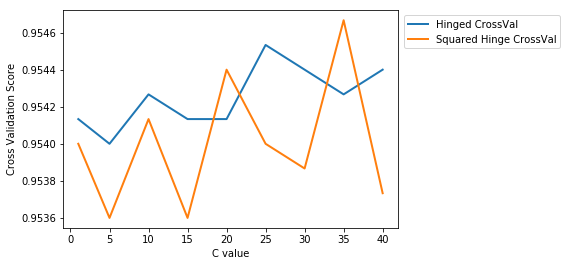

Best Cross Validation Score (Squared-Hinge) 0.9544


In [27]:
H_label = 'Hinged CrossVal'
S_label = 'Squared Hinge CrossVal'
plt.plot(Cs,HingedCV,lw = 2,label = H_label)
plt.plot(Cs,SqHingedCV,lw = 2,label = S_label)
plt.ylabel('Cross Validation Score')
plt.xlabel('C value')
plt.legend(loc = 'upper right',bbox_to_anchor = [1.5,1])
plt.show()
print('Best Cross Validation Score (Squared-Hinge) {}'.format(SqHingedCV[4]))

After running cross validation on many different values of C, the maximum occurs at C=35 with the squared hinge loss function. The squared hinge performs in general worse than the hinged loss function but only barely. It's important to notice that the cross validation scores are varying on the order of $10^{-4}$ which is very small. 

**Part C**: Construct a Feed-Forward Neural Network classifier to make predictions on the data. We recommend using Sklearn's [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) rather than the code you wrote in Homework 4. In our experiments we found training an MLPClassifier to take no more than a minute for reasonable choices of architectures. 

In [63]:
from sklearn.neural_network import MLPClassifier
layers = [(30,30),(33,33,33), (50,50), (25,25,25,25)] #Kept the number of nodes roughly the same but with more or less layers
crossVal = []
for i,l in enumerate(layers):
    classifier = MLPClassifier(hidden_layer_sizes = l, max_iter = 500, solver = 'sgd', learning_rate = 'constant', learning_rate_init = 0.0001)
    crossVal.append( np.mean(cross_val_score(classifier,X_all,y_all)))
print(crossVal)

[0.94493333333333329, 0.94079999999999997, 0.95013333333333339, 0.94813333333333327]


Since we are only comparing the performance of different architectures, I fixed $\eta = 0.0001$ and compared the performance. It looks like every one of them performs similarly but the best performance is achieved at 0.9501 with the network architecture with 100 nodes spread across 2 layers. 

In [64]:
etas = [0.00001,0.0001,0.001,0.01]
crossVal = []
for eta in etas:
    classifier = MLPClassifier(hidden_layer_sizes = (50,50), max_iter = 500, solver = 'sgd', learning_rate = 'constant', learning_rate_init = eta)
    crossVal.append( np.mean(cross_val_score(classifier,X_all,y_all)))
print(crossVal)

[0.93640000000000001, 0.94399999999999995, 0.20013333333333336, 0.20000000000000004]


Looking at the cross validation score, it is clear that the best value is around $\eta = 0.0001$. Before that and the performance is marginally worse implying that the network hasn't converged. Past that and the cross validation tanks drastically which shows that the network is skipping over the correct minimum and diverging.

In [66]:
lams = [0.000001,0.00001,0.0001,0.001]
crossVal = []
for lam in lams:
    classifier = MLPClassifier(hidden_layer_sizes = (50,50), max_iter = 500, solver = 'sgd', learning_rate = 'constant', learning_rate_init = 0.0001, alpha = lam)
    crossVal.append( np.mean(cross_val_score(classifier,X_all,y_all)))
print(crossVal)

[0.94640000000000002, 0.94706666666666672, 0.94346666666666668, 0.9417333333333332]


Looking at varying the L2 regularization parameter, we see that the higher values of regularization result in a decrease in performance, likely due to the classifier focusing on trying to have small weights over correct classification. There is a slight increase in performance from a small regularization to the larger one which shows that there might have been a slight bit of overfitting.  

Combining all of these we have a neural network with 2 hidden layers with 50 nodes each, $\eta = 0.0001$ and $\lambda = 0.00001$.

**Part D**: Which of the three models above performed the best on the data set?  Were you surprised or not surprised by your results?  Discuss. 

The weighted KNN achieved the best results (very narrowly). I am not too surprised by these results because the neural network was a simple neural network and not a convolutional neural network. This makes it more prone to overfitting. Additionally, the dataset may not be linearly separable for the most part which makes the linear SVM much less effective.

**Part E**: For the best model you identified in **Part D**, perform a train-validation split and construct a confusion matrix based on predictions on the validation set.  Which classes tend to get confused with each other the most? Are there any classes for which your model performs exceptionally well?  Plot at least one misclassified example from each of the often-confused classes and suggests reasons why this behavior might occur.   

In [67]:
from sklearn.metrics import confusion_matrix
Wknn = KNeighborsClassifier(n_neighbors=4, weights='distance',algorithm='ball_tree')
X_train, X_test, y_train, y_test = train_test_split(X_all,y_all,test_size = 0.25)
Wknn.fit(X_train,y_train)
y_hat = Wknn.predict(X_test)
mat = confusion_matrix(y_test,y_hat)
print(mat)


[[346   0   9   0   0]
 [ 10 371   4   0   0]
 [  4   0 390   1   0]
 [  0   0   0 348  27]
 [  0   0   0  15 350]]


Looking at the confusion matrix, the greatest confusion comes from classifying label 7 as label 9 with 27 errors. The best classified label is label 3 with only 5 misclassifications. 

In [25]:
def view_img(x, label=None):
    fig = plt.figure(figsize=(3,3))
    plt.imshow(x.reshape(28,28), cmap='gray');
    plt.xticks([]); plt.yticks([]);
    if label: plt.xlabel("true: {}".format(label), fontsize=16)

In [39]:
for i,j in enumerate(y_test):
    if j == 7:
        if y_hat[i] == 9:
            ind = i
            break

view_img(X_train[ind],y_train[ind])

### [30 points] Problem 2: Predicting Authors of Presidential Election Tweets 
***

For the first time in history, the run-up to the 2016 presidential election saw candidates move a large portion of their campaigns from the traditional debating lectern to the Twitterverse. In this problem you will construct various classifiers to predict whether a tweet was sent by @HillaryClinton ($y=0$) or @realDonaldTrump ($y=1$). 

The data set contains $4000$ tweets that have been cleaned by converting all text to lowercase, removing punctuation, and removing hypertext links. In order to preserve hashtags we've replaced the typical # with the string `hashtag` (e.g. `#GiantMeteor` would be converted to `hashtaggiantmeteor`).  

Execute the following cell to load the data. 

In [23]:
f = gzip.open('data/clean_tweets.pklz','rb')
text_all, y_all = pickle.load(f)
f.close()
print(text_all[1], y_all[1])

why not carrier pigeons 0


In [5]:
text_train, text_test, y_train, y_test = train_test_split(text_all,y_all,test_size = 0.25)

**Part A**: Vectorize the text features using the Bag-of-Words text model **while removing stop words**.  Then answer the following questions: 

- How many distinct text features are there in the data after stop words are removed? 
- How many distinct **HashTags** are there in the data? 
- Which candidate uses HashTags the most frequently? 

In [26]:
def vectorize(text):
    stop_words = ['a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from', 'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on',
             'that', 'the', 'to', 'was', 'were', 'will', 'with']
    features = dict()
    vocab = []
    num = 0
    for i,t in enumerate(text):
        temp = t.split()
        uniques = list(set(temp))
        for u in uniques:
            if u not in features:
                if u not in stop_words:
                    vocab.append(u)
                    features[u] = num
                    num += 1
    counts = np.zeros((len(text),len(features)))
    for i,t in enumerate(text):
        temp = t.split()
        for word in temp:
            if word in features:
                counts[i,features[word]] += 1
    return counts,vocab

In [27]:
X_all,vocab = vectorize(text_all)
X_train, X_test, y_train, y_test = train_test_split(X_all,y_all,test_size = 0.25)

**Part B**: Construct a Logistic Regression classifier with L2 regularization to make predictions on the data. Exactly as in **Problem 1**, you should clearly detail your process for picking optimal hyperparameters and evaluating your model, and report the details of your best model along with final validation accuracy. 

In [15]:
from sklearn.linear_model import LogisticRegression
lams = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,5,10,15]
acc = []
for lam in lams:
    classifier = LogisticRegression(C=1/lam)
    acc.append(np.mean(cross_val_score(classifier,X_all,y_all)))
    print(lam)
print(acc)

1e-06
1e-05
0.0001
0.001
0.01
0.1
1
5
10
15
[0.89324707015861449, 0.89274694484589545, 0.89524532028280157, 0.9059963261612437, 0.91074582828705763, 0.91049670360015178, 0.91124933028981003, 0.90274982628805722, 0.89424882153517837, 0.88774981878430159]


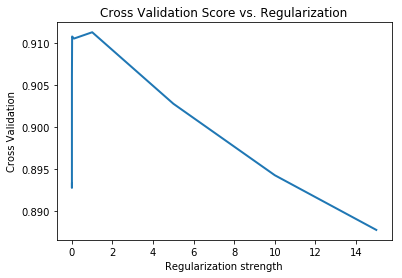

0.91124933029
1
Maximum Cross Validation achieved: 0.91124933028981 with regularization 1


In [20]:
plt.plot(lams,acc, lw = 2)
plt.title('Cross Validation Score vs. Regularization')
plt.xlabel('Regularization strength')
plt.ylabel('Cross Validation')
plt.show()
maxAcc = np.max(acc)
print(maxAcc)
maxInd = np.argmax(acc)
print(lams[maxInd])
print('Maximum Cross Validation achieved: {} with regularization {}'.format(maxAcc,lams[maxInd]))

There are 2 hyper parameters in typical logistic regression, the learning rate and the regularization. The learning rate only really changes the convergence, but the sklearn logistic regression classifier allows for many epochs for convergence as well as not using SGD for learning. This means that tuning the learning rate is unnecessary.  
Instead I explore the impact of different regularization strengths on the classifier. It seems that a regularization strength of 1 helps preventing overfitting which was occurring at the low regularization. After that however, there is a dramatic decrease in performance as the model becomes too inflexible. 

**Part C**: Determine and report the 10 words that are the best predictors for @HillaryClinton and the 10 words that are the best predictors for @realDonaldTrump in your Logistic Regression model. In addition, you should briefly discuss how you found these best features mathematically. 

In [31]:
classifier = LogisticRegression(C=1)
classifier.fit(X_train,y_train)
betas = classifier.coef_
print(betas)
class0betas = np.argsort(betas[0])
class1betas = np.argsort(-1*betas[0])
class0 = class0betas[0:9]
class1 = class1betas[0:9]
print("\nbest words for Hillary Clinton")
print("----------------------")
for ind in class0:
    print(vocab[ind])

print("\nbest words for Donald Trump")
print("----------------------")
for ind in class1:
    print(vocab[ind])

[[ 2.46191065 -0.02841942 -0.32930056 ...,  0.         -0.03097082
  -0.03097082]]

best words for Hilary Clinton
----------------------
timkaine
potus
rt
h
barack
billclinton
his
hillary
HASHTAGdemsinphilly

best words for Donald Trump
----------------------
crooked
realdonaldtrump
HASHTAGmakeamericagreatagain
thank
HASHTAGamericafirst
media
HASHTAGtrump2016
HASHTAGcrookedhillary
cnn


Hillary Clinton is class 0 and Donald Trump is class 1. With every word except stop words having a coefficient associated to it, we can figure out which words contribute to classifying as Hillary or classifying as Donald. Since Hillary is class 0, negative coefficients will contribute to her and positive will contribute to Donald. The strength of those coefficients represent how much they contribute, so the 10 highest magnitude positive coefficients are for Donald and the the 10 highest magnitude negative are for Hillary. 

**Part D**: Construct a Naive Bayes classifier to make predictions on the data. Again, you should clearly detail your process for picking optimal hyperparameters and evaluating your model, and report the details of your best model along with final validation accuracy. **Hint**: Since text features are discrete, you'll want to use Sklearn's [MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) classifier. 

In [34]:
from sklearn.naive_bayes import MultinomialNB
alphas = [0, 0.5,1,1.5,2, 2.5, 3]
acc = []
for alpha in alphas:
    classifier = MultinomialNB(alpha = alpha)
    acc.append(np.mean(cross_val_score(classifier,X_all,y_all)))
print(acc)

D:\School\Anaconda\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
D:\School\Anaconda\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
D:\School\Anaconda\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[0.89199619409514463, 0.92274883579231404, 0.92424921173047103, 0.92074946010478254, 0.91974883429156284, 0.9184979582280931, 0.91724745735240498]


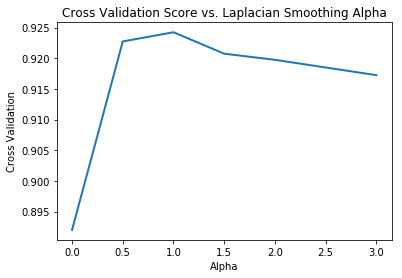

0.92424921173
0.0001
Maximum Cross Validation achieved: 0.924249211730471 with alpha 1


In [36]:
plt.plot(alphas,acc, lw = 2)
plt.title('Cross Validation Score vs. Laplacian Smoothing Alpha')
plt.xlabel('Alpha')
plt.ylabel('Cross Validation')
plt.show()
maxAcc = np.max(acc)
print(maxAcc)
maxInd = np.argmax(acc)
print(lams[maxInd])
print('Maximum Cross Validation achieved: {} with alpha {}'.format(maxAcc,alphas[maxInd]))

Laplacian smoothing smooths out the data by adding a fixed alpha value so that no probabilities will ever be set to 0, just very small. The above graph shows that the simple add one laplacian smoothing works the best. 

**Part E**: Determine and report the 10 words that are the best predictors for @HillaryClinton and the 10 words that are the best predictors for @realDonaldTrump in your Naive Bayes model. In addition, you should briefly discuss how you found these best features mathematically. 

In [38]:
classifier = MultinomialNB(alpha = 1)
classifier.fit(X_train,y_train)
probs = classifier.feature_log_prob_
hillProbs = probs[0]
trumpProbs = probs[1]
hillInds = np.argsort(hillProbs)
trumpInds = np.argsort(trumpProbs)
hillInds = hillInds[0:9]
trumpInds = trumpInds[0:9]
print("\nbest words for Hillary Clinton")
print("----------------------")
for ind in hillInds:
    print(vocab[ind])

print("\nbest words for Donald Trump")
print("----------------------")
for ind in trumpInds:
    print(vocab[ind])


best words for Hillary Clinton
----------------------
otherwisethat
carrying
HASHTAGrepmikekelly
mcmaster
lt
announcer
henry
bakari
funny

best words for Donald Trump
----------------------
otherwisethat
sport
spectator
becauseive
devotion
absurd
provide
disabilitiesto
disabilities


The feature_log_prob attribute from MultinomialNB returns $log(P(feature|y_i))$ This means that if the probability of the feature given the class is high, the word will contribute to classifying for that class. Therefore I chose the 10 words with the highest probability for Hillary and for Trump.

**Part F**: Which of the two models above performed the best on the data set?  Were you surprised or not surprised by your results?  Discuss. 

The Naive Bayes performed marginally better with around a 1% improvement over the logistic regression. I am not surprised by the results since bag of words used on logistic regressions can cause the classifier to skew towards whoever uses more words in their tweets among other things. In this way, Naive Bayes is better. The word choices of the most important in Naive Bayes was surprising though.

### [25 points] Problem 3: Feature Engineering and Presidential Tweets 
***

In this problem you will again work with the Twitter election data from **Problem 2**, but this time in its unadulterated raw form. Unlike in **Problem 2**, you will only be allowed to use Logistic Regression as your classifier.  Instead of using a fancier model, you will attempt to improve performance by crafting better features.  One way you might do this is to explore text models that are more sophisticated that simple Bag-of-Words. Alternatively, you might explore the training data and identify characteristics of tweets by a particular author that you can then turn into a feature. 

The class `TweetFeaturizer` shown below is already fully functional.  Your goal in this problem is to make it better.  In it's current state, the class reads in the training and test data, fits a Logistic Regression model using Bag-of-Words, makes predictions on the test set, and then dumps the predictions to a csv file that can be uploaded to Kaggle. You are free to modify this class is any way that you see fit, but we've given you some helpful functionality that will prove sufficient for most of you.  The `add_text_features` method currently loops over each tweet in the data set, copies it to a new array, and then passes that array into the text vectorizer.  One way to create new features is to append distinct word-indicators onto the string representing the tweet.  These will then be turned into features by the vectorizer. 

As an example (that is intentionally silly and probably unhelpful): Suppose you think a potentially helpful feature is whether or not the tweet contains more than 10 instances of the letter `z`.  In `add_text_features` you could count the number of `z`'s in a tweet and if there are more than 10, you could append the word `MoreThanTenZs` to the tweet.  Then, when the tweet is passed into the vectorizer, this will turn into a numerical feature.  

In addition to competing against yourself to craft the best features that you can, you'll also compete against your classmates in a Kaggle competition.  The competition page can be found here: 

https://www.kaggle.com/c/4622-election-tweet-authorship

A private invite link will be available on Piazza which will get you into the competition. Note that the test data has been partitioned into a public leaderboard set and a private leaderboard set.  While the competition is open, submitting to Kaggle will tell you your score on the public leaderboard.  Your scores on the private leaderboard will become available at the end of the competition.   The top **THREE** students on the **Private** leaderboard at the end of the competition will earn 10 extra credit points on the Practicum. Note that to prevent the machine learning-equivalent of button mashing, we've limited you to **10** submissions per day.  You should be evaluating your features locally with cross-validation and then submitting to Kaggle when you think you have something that works.  

**Part A**: **Feature Engineering**:  What you need to do: 

- Explore and experiment with the data to try to find good features 
- Implement these features in the `TweetFeaturizer` class  
- Implement some evaluation methods to see how well your features improve your model (*cough* cross-validation *cough*) 
- Make submissions to the Kaggle competition and see how you compared to your classmates 

**Part B**: **Motivation and Analysis**: What you need to do: 

Convince me that:

- Your new features work
- You understand what the new features are doing
- You had a clear methodology for incorporating the new features


In [ ]:
class TweetFeaturizer:
    def __init__(self):
        
        from sklearn.feature_extraction.text import CountVectorizer
        
        self.vectorizer = CountVectorizer()
        
    def add_text_features(self, examples):
        """
        Method for looping over original text and adding new text 
        features. 
        :param examples: the list of raw tweets 
        """
        
        new_examples = [] 
        for ex in examples:
            # here is where you might try to add new features 
            # currently this does nothing.  
            new_examples.append(ex)
            
        return new_examples

    def build_train_features(self, examples):
        """
        Method to take in training text features and do further feature engineering 
        Most of the work in this homework will go here, or in similar functions  
        :param examples: the list of raw tweets 
        """
        
        new_examples = self.add_text_features(examples)
        return self.vectorizer.fit_transform(new_examples)

    def get_test_features(self, examples):
        """
        Method to take in test text features and transform the same way as train features 
        :param examples: the list of raw tweets
        """
        new_examples = self.add_text_features(examples)
        return self.vectorizer.transform(new_examples)

    def show_top10(self):
        """
        prints the top 10 features for the positive class and the 
        top 10 features for the negative class. 
        """
        feature_names = np.asarray(self.vectorizer.get_feature_names())
        top10 = np.argsort(self.logreg.coef_[0])[-10:]
        bottom10 = np.argsort(self.logreg.coef_[0])[:10]
        print("DT: %s" % " ".join(feature_names[top10]))
        print("HC: %s" % " ".join(feature_names[bottom10]))
                
    def train_model(self, random_state=1234):
        """
        Method to read in training data from file, and 
        train Logistic Regression classifier. 
        
        :param random_state: seed for random number generator 
        """
        
        from sklearn.linear_model import LogisticRegression 
        
        # load data 
        f = gzip.open('data/raw_tweets_train.pklz','rb')
        text_train, y_train = pickle.load(f)
        f.close()
        
        # get training features and labels 
        self.X_train = self.build_train_features(text_train)
        self.y_train = y_train
        
        # train logistic regression model.  !!MUST USE LogisticRegression!! 
        self.logreg = LogisticRegression(random_state=random_state)
        self.logreg.fit(self.X_train, self.y_train)
        
    def model_predict(self):
        """
        Method to read in test data from file, make predictions
        using trained model, and dump results to file 
        """
        
        # read in test data 
        f = gzip.open('data/raw_tweets_test.pklz','rb')
        text_valid = pickle.load(f)
        f.close()
        
        # featurize test data 
        self.X_test = self.get_test_features(text_valid)
        
        # make predictions on test data 
        pred = self.logreg.predict(self.X_test)
        
        # dump predictions to file for submission to Kaggle  
        pd.DataFrame({"realDonaldTrump": np.array(pred, dtype=bool)}).to_csv("prediction.csv", index=True, index_label="Id")
        

# Instantiate the class 
feat = TweetFeaturizer()

# Train your Logistic Regression classifier 
feat.train_model(random_state=1234)

# Show the top 10 features for each class 
feat.show_top10()

# Make prediction on test data and produce Kaggle submission file 
feat.model_predict()

### References
***

